In [1]:
import pandas as pd
data=pd.read_csv("fruitazia.csv")
"""
In the data, each out of 30 rows encodes experiment description per supermarket,
including set price and advertising expenditure as well as the resulting sales. Sales are in thousands of cases. 
Price is in dollars. Ad spend is in million dollars. 
The rest of the variables are dummies encoding distinct price, ad spend levels, and their interactions.
"""
data

,Sales,Price,AdSpend
0,499,3.9,1
1,595,3.9,1
2,496,3.9,1
3,607,3.9,1
4,550,3.9,1
5,989,3.9,2
6,721,3.9,2
7,823,3.9,2
8,1001,3.9,2
9,881,3.9,2


In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
Sales      30 non-null int64
Price      30 non-null float64
AdSpend    30 non-null int64
dtypes: float64(1), int64(2)
memory usage: 848.0 bytes


In [4]:
data["Price"]=data["Price"].apply(lambda x:str(x))
data["AdSpend"]=data["AdSpend"].apply(lambda x:str(x))

In [5]:
lr=smf.ols('Sales ~ Price+AdSpend', data)
lr.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     29.59
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.54e-08
Time:                        13:43:47   Log-Likelihood:                -176.78
No. Observations:                  30   AIC:                             361.6
Df Residuals:                      26   BIC:                             367.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      615.3000     34.387     17.893      0.000     544.616     685.984
Price[T.4.9]  -179.8000     42.116     -4.269      0.000    -266.370     -93.230
Price[T.5.9]  -309.1000     42.116     -7.339      0.000    -395.670    -222.530
AdSpend[T.2]   201.8000     34.387      5.868      0.000     131.116     272.484
==============================================================================
Omnibus:                        0.899   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.783
Skew:                           0.367   Prob(JB):                        0.676
Kurtosis:                       2.706   Cond. No.                         4.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
lr2=smf.ols('Sales ~ Price*AdSpend', data)
lr2.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     31.08
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           9.78e-10
Time:                        13:43:47   Log-Likelihood:                -168.88
No. Observations:                  30   AIC:                             349.8
Df Residuals:                      24   BIC:                             358.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   549.4000     33.687     16.309      0.000     479.873     618.927
Price[T.4.9]               -119.2000     47.641     -2.502      0.020    -217.527     -20.873
Price[T.5.9]               -172.0000     47.641     -3.610      0.001    -270.327     -73.673
AdSpend[T.2]                333.6000     47.641      7.002      0.000     235.273     431.927
Price[T.4.9]:AdSpend[T.2]  -121.2000     67.375     -1.799      0.085    -260.255      17.855
Price[T.5.9]:AdSpend[T.2]  -274.2000     67.375     -4.070      0.000    -413.255    -135.145
==============================================================================
Omnibus:                        0.873   Durbin-Watson:                   2.712
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.150
Skew:                          -0.040   Prob(JB):                        0.928
Kurtosis:                       3.337   Cond. No.                         9.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

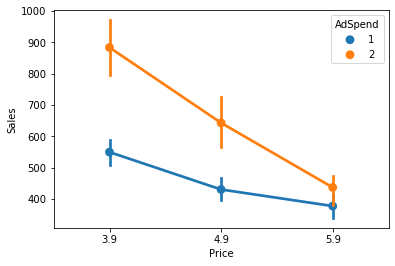

In [7]:
sns.pointplot(data=data, x='Price', y='Sales',hue="AdSpend")


In [8]:
table = sm.stats.anova_lm(lr2.fit(), typ=2) 
print(table)

                      sum_sq    df          F        PR(>F)
Price          481964.466667   2.0  42.469692  1.307121e-08
AdSpend        305424.300000   1.0  53.826690  1.409920e-07
Price:AdSpend   94403.400000   2.0   8.318628  1.800704e-03
Residual       136181.200000  24.0        NaN           NaN
